# Anomaly Detection for ABC Automotive Warranty Data

## Problem Statement and Business Context

### What is Anomaly Detection?
Anomaly detection is the identification of unusual patterns or data points that deviate significantly from the expected normal behavior in a dataset. These anomalies may indicate:
- **System failures** or defects
- **Fraudulent activities** 
- **Quality control issues**
- **Process inefficiencies**
- **Potential risks** requiring immediate attention

### Business Problem: ABC Automotive Warranty Cost Management

ABC Automotive faces significant challenges in managing warranty costs and identifying high-risk vehicles that may lead to expensive claims. Traditional reactive approaches result in:

**Current Pain Points:**
- **Unexpected warranty costs** consuming 15-20% of revenue
- **Late detection** of problematic vehicles leading to customer dissatisfaction
- **Manual inspection** processes that miss critical patterns
- **Reactive maintenance** instead of proactive intervention
- **Limited insight** into root causes of expensive claims

**Business Objectives:**
Through anomaly detection, ABC Automotive aims to:

1. **Early Warning System**: Identify vehicles showing unusual patterns before costly failures occur
2. **Cost Optimization**: Reduce warranty costs by 25-30% through proactive intervention
3. **Quality Assurance**: Detect manufacturing defects and design issues early
4. **Customer Satisfaction**: Prevent breakdowns and improve vehicle reliability
5. **Operational Efficiency**: Optimize maintenance schedules and resource allocation

### What We Can Achieve with Anomaly Detection

**Immediate Benefits:**
- **Risk Identification**: Flag vehicles with unusual behavior patterns
- **Cost Prediction**: Identify potential high-cost warranty claims
- **Preventive Maintenance**: Schedule interventions before failures occur
- **Quality Control**: Detect systematic issues in vehicle segments

**Long-term Value:**
- **Data-Driven Insights**: Understand relationships between vehicle features and warranty costs
- **Process Improvement**: Optimize manufacturing and design processes
- **Competitive Advantage**: Improve vehicle reliability and customer trust
- **Financial Planning**: Better budget allocation for warranty reserves

## Session Overview
Building on our clustering analysis, we now explore **anomaly detection** - identifying unusual patterns that deviate from normal behavior in warranty data.

## Learning Objectives
1. Understand different types of anomalies and their business implications
2. Apply various anomaly detection algorithms using PyOD library
3. Evaluate and compare detection performance using appropriate metrics (F1-Score, Balanced Accuracy)
4. Distinguish between outliers and anomalies in multivariate contexts
5. Interpret results for actionable business insights
6. Implement semi-supervised learning approaches for enhanced detection

## Why Anomaly Detection Matters for Automotive Industry
- **Fraud Prevention**: Identify potentially fraudulent warranty claims
- **Quality Control**: Detect manufacturing defects early in the lifecycle
- **Predictive Maintenance**: Flag vehicles requiring immediate attention
- **Cost Optimization**: Prevent high-cost failures before they occur
- **Customer Safety**: Ensure vehicle reliability and prevent dangerous failures

---

## 1. Environment Setup and Library Installation

In [47]:
# Install PyOD library for anomaly detection (Google Colab)
!pip install -q pyod
!pip install -q pandas numpy scikit-learn matplotlib seaborn plotly

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    f1_score, balanced_accuracy_score,
    roc_auc_score, roc_curve, precision_recall_curve
)

# PyOD imports - we'll add specific algorithms as we use them
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📚 PyOD library installed and ready for anomaly detection")

✅ Libraries imported successfully!
📚 PyOD library installed and ready for anomaly detection


## 2. PyOD Library Overview

**PyOD** (Python Outlier Detection) is a comprehensive Python library for detecting outliers in multivariate data.

Let's explore the most commonly used algorithms:

## Understanding Outliers vs Anomalies

Before we dive into detection algorithms, it's crucial to understand the subtle but important distinction between **outliers** and **anomalies**:

### Outliers
- **Definition**: Data points that lie isolated from the rest of the samples
- **Characteristics**: 
  - Always **spatially separated** from normal data
  - Can be detected using **statistical methods** (IQR, Z-score)
  - Often represent **measurement errors** or **extreme but valid** observations
- **Example**: A vehicle with unusually high mileage but otherwise normal behavior

### Anomalies 
- **Definition**: Data points that exhibit **unusual or unexpected patterns** that differ from normal behavior
- **Characteristics**: 
  - **May not always be isolated** spatially
  - Defined by **multivariate patterns** and relationships
  - Often represent **system failures**, **process changes**, or **significant events**
  - Require **multivariate analysis** to detect
- **Example**: A vehicle with normal individual features but an unusual combination (e.g., low mileage + high repair costs + recent model)

### Key Insight for Our Dataset
In our warranty data, we focus on **anomaly detection** because:
- We're looking for **unusual patterns** in vehicle behavior that predict high warranty costs
- Spatial isolation alone doesn't capture complex relationships between features
- **Business context matters** - a "normal" data point statistically might be anomalous from a business perspective

**Note**: Our synthetic dataset contains clear anomalies with both spatial and pattern-based characteristics, making it excellent for learning various detection techniques.

---

In [49]:
# PyOD Common Algorithms Reference
pyod_algorithms = pd.DataFrame([
    {'Algorithm': 'KNN', 'Type': 'Proximity-Based', 
     'Description': 'K-Nearest Neighbors - Detects outliers based on distance to k nearest neighbors'},
    
    {'Algorithm': 'LOF', 'Type': 'Proximity-Based', 
     'Description': 'Local Outlier Factor - Identifies outliers by comparing local density'},
    
    {'Algorithm': 'IForest', 'Type': 'Ensemble', 
     'Description': 'Isolation Forest - Isolates anomalies using random decision trees'},
    
    {'Algorithm': 'OCSVM', 'Type': 'Boundary-Based', 
     'Description': 'One-Class SVM - Learns a boundary around normal data points'},
    
    {'Algorithm': 'PCA', 'Type': 'Linear Model', 
     'Description': 'Principal Component Analysis - Detects outliers in PCA subspace'},
    
    {'Algorithm': 'MCD', 'Type': 'Statistical', 
     'Description': 'Minimum Covariance Determinant - Robust covariance estimation'},
    
    {'Algorithm': 'CBLOF', 'Type': 'Clustering-Based', 
     'Description': 'Cluster-Based LOF - Combines clustering with outlier detection'},
    
    {'Algorithm': 'HBOS', 'Type': 'Statistical', 
     'Description': 'Histogram-Based Outlier Score - Fast detection using histograms'},
    
    {'Algorithm': 'ECOD', 'Type': 'Statistical', 
     'Description': 'Empirical Cumulative Distribution - Unsupervised outlier detection'},
    
    {'Algorithm': 'COPOD', 'Type': 'Statistical', 
     'Description': 'Copula-Based Outlier Detection - Parameter-free, interpretable detection'}
])

print("🔍 PyOD Algorithm Reference Guide")
print("="*80)
for _, row in pyod_algorithms.iterrows():
    print(f"\n📌 {row['Algorithm']} ({row['Type']})")
    print(f"   → {row['Description']}")

🔍 PyOD Algorithm Reference Guide

📌 KNN (Proximity-Based)
   → K-Nearest Neighbors - Detects outliers based on distance to k nearest neighbors

📌 LOF (Proximity-Based)
   → Local Outlier Factor - Identifies outliers by comparing local density

📌 IForest (Ensemble)
   → Isolation Forest - Isolates anomalies using random decision trees

📌 OCSVM (Boundary-Based)
   → One-Class SVM - Learns a boundary around normal data points

📌 PCA (Linear Model)
   → Principal Component Analysis - Detects outliers in PCA subspace

📌 MCD (Statistical)
   → Minimum Covariance Determinant - Robust covariance estimation

📌 CBLOF (Clustering-Based)
   → Cluster-Based LOF - Combines clustering with outlier detection

📌 HBOS (Statistical)
   → Histogram-Based Outlier Score - Fast detection using histograms

📌 ECOD (Statistical)
   → Empirical Cumulative Distribution - Unsupervised outlier detection

📌 COPOD (Statistical)
   → Copula-Based Outlier Detection - Parameter-free, interpretable detection


## 3. Generate and Load the Anomaly Dataset

Let's start by generating our synthetic warranty data with intentional anomalies.

In [ ]:
df = pd.read_csv("./abc_warranty_anomaly_data.csv") # NOTE: Change the path to the approriate location of your dataset, whether on Colab or locally.

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"\n🎯 Target Distribution:")
print(df['is_anomaly'].value_counts())
print(f"\nAnomaly Rate: {df['is_anomaly'].mean():.1%}")


📊 Dataset Shape: (10000, 28)

🎯 Target Distribution:
is_anomaly
0    9500
1     500
Name: count, dtype: int64

Anomaly Rate: 5.0%


## 4. Initial Data Exploration

Let's explore our data to understand the patterns before detecting anomalies.

In [51]:
# Quick data overview
print("📋 Dataset Info:")
print("="*50)
print(f"Total samples: {len(df):,}")
print(f"Features: {len(df.columns) - 3}")  # Excluding id, labels
print(f"\nFirst few records:")
df.head()

📋 Dataset Info:
Total samples: 10,000
Features: 25

First few records:


,vehicle_id,vehicle_type,fuel_type,transmission_type,manufacturing_year,vehicle_age_months,current_mileage,services_completed,days_since_last_service,region,avg_daily_runtime_hours,avg_speed_kmph,harsh_acceleration_count,harsh_braking_count,engine_risk_score,transmission_risk_score,electrical_risk_score,ac_cooling_risk_score,suspension_risk_score,brakes_risk_score,exhaust_risk_score,battery_risk_score,total_warranty_cost,number_of_claims,previous_claims_count,warranty_usage_ratio,is_anomaly,anomaly_type
0,ABC_006252,Sedan,Diesel,CVT,2022,2.85,32524.70,2,57.15,South,1.97,31.99,8,7,0.00,0.02,0.06,0.03,0.02,0.00,0.04,0.04,54251.11,1,0,0.14,0,Normal
1,ABC_004684,SUV,Petrol,Manual,2018,60.00,13940.12,2,42.90,East,2.61,37.00,4,3,0.02,0.06,0.21,0.02,0.03,0.02,0.00,0.01,67312.03,2,1,0.26,0,Normal
2,ABC_001731,SUV,Hybrid,Manual,2024,11.46,9297.57,2,80.15,West,1.66,39.78,4,5,0.06,0.06,0.03,0.05,0.17,0.07,0.10,0.01,28827.14,3,4,0.07,0,Normal
3,ABC_004742,Hatchback,Diesel,Manual,2022,14.55,29562.46,5,21.51,South,2.36,32.69,4,4,0.04,0.01,0.01,0.09,0.08,0.02,0.06,0.01,42704.70,0,1,0.44,0,Normal
4,ABC_004521,SUV,Petrol,Manual,2019,19.33,16089.28,5,63.83,Northeast,3.14,28.67,5,3,0.17,0.09,0.03,0.03,0.06,0.12,0.04,0.05,58274.46,3,0,0.14,0,Normal


💰 Warranty Cost Analysis:
         count      mean    median      std      min       max
Normal    9500  55062.59  55033.92 19939.56  5000.00 127727.24
Anomaly    500 184290.30 167097.14 76388.30 83348.53 498896.24

📈 Key Business Insights:
   • Anomalies cost 3.3x more than normal vehicles
   • Cost difference: ₹129,228 per vehicle
   • Total anomaly cost impact: ₹64,613,855


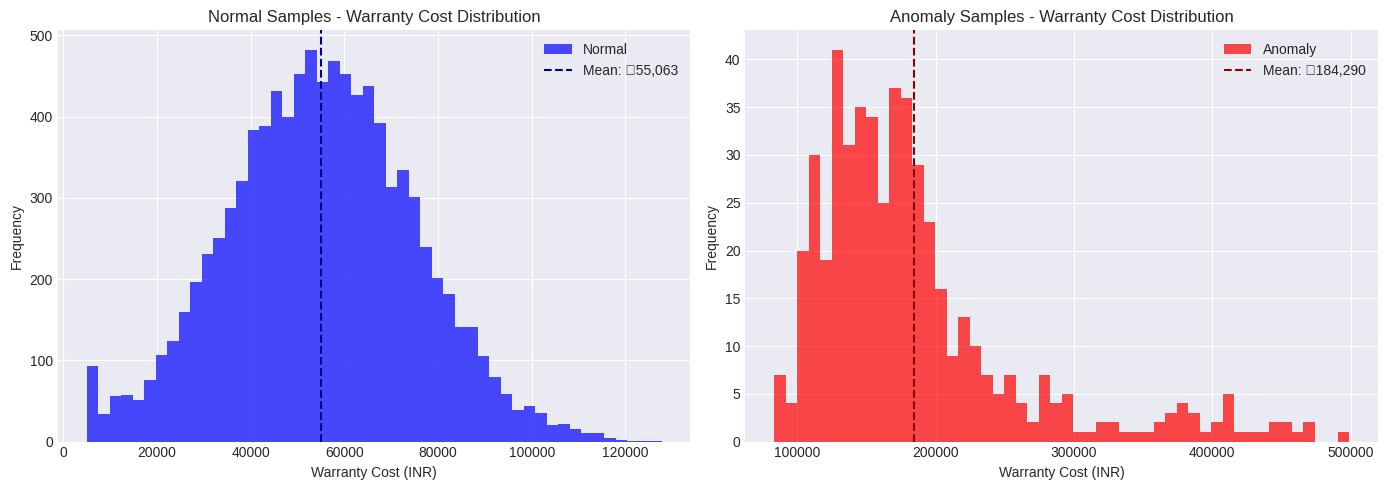


💡 Critical Business Insight:
   Anomalous vehicles represent only 5% of the fleet but account for
   15.0% of total warranty costs!
   Early detection could save millions in warranty expenses.


In [52]:
# Interesting discovery: Let's see how warranty costs differ
print("💰 Warranty Cost Analysis:")
print("="*50)

cost_stats = df.groupby('is_anomaly')['total_warranty_cost'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
])
cost_stats.index = ['Normal', 'Anomaly']
print(cost_stats)

# Calculate additional business insights
normal_avg = df[df['is_anomaly']==0]['total_warranty_cost'].mean()
anomaly_avg = df[df['is_anomaly']==1]['total_warranty_cost'].mean()
cost_multiplier = anomaly_avg / normal_avg

print(f"\n📈 Key Business Insights:")
print(f"   • Anomalies cost {cost_multiplier:.1f}x more than normal vehicles")
print(f"   • Cost difference: ₹{anomaly_avg - normal_avg:,.0f} per vehicle")
print(f"   • Total anomaly cost impact: ₹{(anomaly_avg - normal_avg) * 500:,.0f}")

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution comparison
df[df['is_anomaly']==0]['total_warranty_cost'].hist(bins=50, alpha=0.7, 
                                                     label='Normal', ax=axes[0], color='blue')
df[df['is_anomaly']==1]['total_warranty_cost'].hist(bins=50, alpha=0.7, 
                                                     label='Anomaly', ax=axes[1], color='red')
axes[0].set_title('Normal Samples - Warranty Cost Distribution')
axes[0].set_xlabel('Warranty Cost (INR)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(normal_avg, color='darkblue', linestyle='--', label=f'Mean: ₹{normal_avg:,.0f}')
axes[0].legend()

axes[1].set_title('Anomaly Samples - Warranty Cost Distribution')
axes[1].set_xlabel('Warranty Cost (INR)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(anomaly_avg, color='darkred', linestyle='--', label=f'Mean: ₹{anomaly_avg:,.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\n💡 Critical Business Insight:")
print(f"   Anomalous vehicles represent only 5% of the fleet but account for")
print(f"   {(anomaly_avg * 500) / (normal_avg * 9500 + anomaly_avg * 500) * 100:.1f}% of total warranty costs!")
print(f"   Early detection could save millions in warranty expenses.")

💰 Warranty Cost Analysis:
         count      mean    median      std      min       max
Normal    9500  55062.59  55033.92 19939.56  5000.00 127727.24
Anomaly    500 184290.30 167097.14 76388.30 83348.53 498896.24


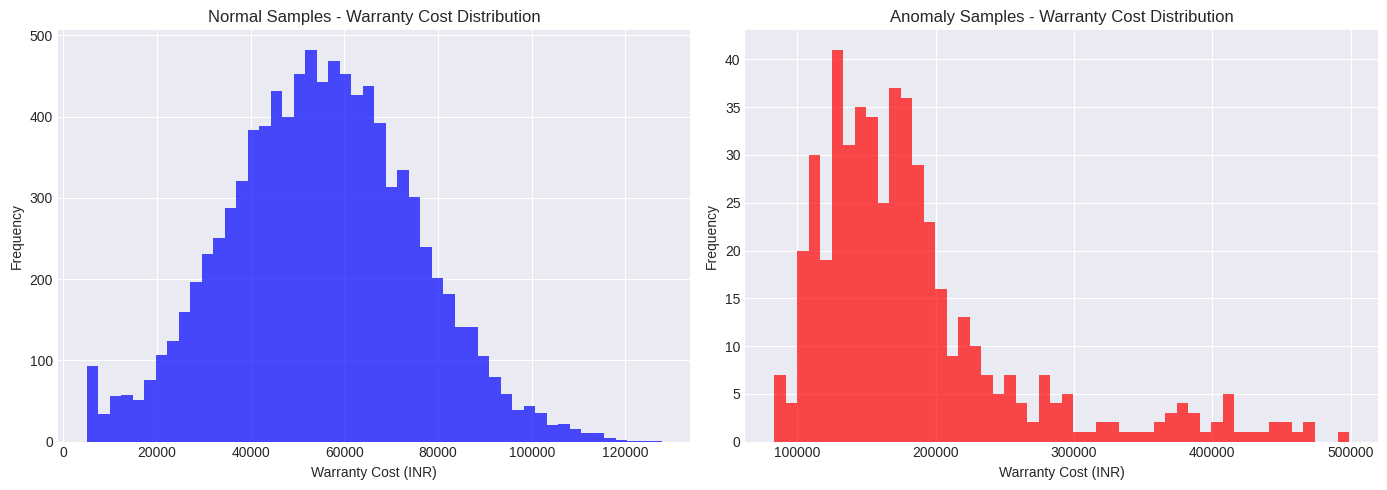


💡 Insight: Anomalies tend to have significantly higher warranty costs!


In [53]:
# Interesting discovery: Let's see how warranty costs differ
print("💰 Warranty Cost Analysis:")
print("="*50)

cost_stats = df.groupby('is_anomaly')['total_warranty_cost'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
])
cost_stats.index = ['Normal', 'Anomaly']
print(cost_stats)

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution comparison
df[df['is_anomaly']==0]['total_warranty_cost'].hist(bins=50, alpha=0.7, 
                                                     label='Normal', ax=axes[0], color='blue')
df[df['is_anomaly']==1]['total_warranty_cost'].hist(bins=50, alpha=0.7, 
                                                     label='Anomaly', ax=axes[1], color='red')
axes[0].set_title('Normal Samples - Warranty Cost Distribution')
axes[0].set_xlabel('Warranty Cost (INR)')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Anomaly Samples - Warranty Cost Distribution')
axes[1].set_xlabel('Warranty Cost (INR)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n💡 Insight: Anomalies tend to have significantly higher warranty costs!")

## 5. Data Preprocessing for Anomaly Detection

Now let's prepare our data for anomaly detection algorithms.

In [54]:
# Separate features and labels
exclude_cols = ['vehicle_id', 'is_anomaly', 'anomaly_type']
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Identify categorical and numerical columns
categorical_cols = df[feature_cols].select_dtypes(include=['object']).columns.tolist()
numerical_cols = df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"📊 Feature Types:")
print(f"Categorical ({len(categorical_cols)}): {categorical_cols[:3]}...")
print(f"Numerical ({len(numerical_cols)}): {numerical_cols[:5]}...")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("\n✅ Categorical variables encoded")

📊 Feature Types:
Categorical (4): ['vehicle_type', 'fuel_type', 'transmission_type']...
Numerical (21): ['manufacturing_year', 'vehicle_age_months', 'current_mileage', 'services_completed', 'days_since_last_service']...

✅ Categorical variables encoded


In [55]:
# Create feature matrix and labels
X = df_encoded[feature_cols].values
y = df_encoded['is_anomaly'].values

# Standardize features (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"🎯 Feature matrix shape: {X_scaled.shape}")
print(f"🏷️ Labels shape: {y.shape}")
print(f"\n📊 Class distribution:")
print(f"   Normal samples: {(y==0).sum()} ({(y==0).mean():.1%})")
print(f"   Anomalies: {(y==1).sum()} ({(y==1).mean():.1%})")

🎯 Feature matrix shape: (10000, 25)
🏷️ Labels shape: (10000,)

📊 Class distribution:
   Normal samples: 9500 (95.0%)
   Anomalies: 500 (5.0%)


## 6. Dimensionality Reduction for Visualization

Let's visualize our data in 2D to see if anomalies are visually separable.

In [56]:
# PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"📉 PCA Explained Variance: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# Create visualization dataframe
viz_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'is_anomaly': y,
    'label': ['Anomaly' if x == 1 else 'Normal' for x in y]
})

# Interactive plot with Plotly
fig = px.scatter(viz_df, x='PC1', y='PC2', color='label',
                color_discrete_map={'Normal': 'blue', 'Anomaly': 'red'},
                title='PCA Visualization of Normal vs Anomalous Samples',
                opacity=0.6)
fig.update_traces(marker=dict(size=5))
fig.update_layout(height=500)
fig.show()

print("\n💡 Observation: Can you see any patterns in how anomalies are distributed?")

📉 PCA Explained Variance: [0.40259292 0.04524068]
Total variance explained: 44.78%



💡 Observation: Can you see any patterns in how anomalies are distributed?


## 7. Anomaly Detection with PyOD

Now let's apply various anomaly detection algorithms from PyOD library.

### 7.1 K-Nearest Neighbors (KNN) Based Detection

In [57]:
from pyod.models.knn import KNN

# Initialize KNN detector
knn_detector = KNN(n_neighbors=5, contamination=0.05)  # contamination = expected anomaly rate

# Fit the model
knn_detector.fit(X_scaled)

# Get predictions
knn_predictions = knn_detector.predict(X_scaled)  # 0: normal, 1: anomaly
knn_scores = knn_detector.decision_scores_  # Anomaly scores

# Evaluate performance
print("🎯 KNN Detector Performance:")
print("="*50)
print(f"F1 Score: {f1_score(y, knn_predictions):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y, knn_predictions):.4f}")

# Confusion Matrix
cm = confusion_matrix(y, knn_predictions)
print("\n📊 Confusion Matrix:")
print(pd.DataFrame(cm, 
                  index=['True Normal', 'True Anomaly'],
                  columns=['Pred Normal', 'Pred Anomaly']))

🎯 KNN Detector Performance:
F1 Score: 0.9185
Balanced Accuracy: 0.9494

📊 Confusion Matrix:
              Pred Normal  Pred Anomaly
True Normal          9469            31
True Anomaly           49           451


### 7.2 Local Outlier Factor (LOF)

In [58]:
from pyod.models.lof import LOF

# Initialize LOF detector
lof_detector = LOF(n_neighbors=20, contamination=0.05)

# Fit and predict
lof_detector.fit(X_scaled)
lof_predictions = lof_detector.predict(X_scaled)
lof_scores = lof_detector.decision_scores_

# Evaluate
print("🎯 LOF Detector Performance:")
print("="*50)
print(f"F1 Score: {f1_score(y, lof_predictions):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y, lof_predictions):.4f}")

# Let's understand what LOF found
lof_anomalies = df[lof_predictions == 1]['anomaly_type'].value_counts()
print("\n🔍 Types of anomalies detected by LOF:")
print(lof_anomalies.head())

🎯 LOF Detector Performance:
F1 Score: 0.0957
Balanced Accuracy: 0.5242

🔍 Types of anomalies detected by LOF:
anomaly_type
Normal                   376
Point_Extreme_Mileage     19
Point_Extreme_Cost        13
Point_Extreme_Claims      12
Name: count, dtype: int64


### 7.3 Isolation Forest

In [59]:
from pyod.models.iforest import IForest

# Initialize Isolation Forest
iforest_detector = IForest(contamination=0.05, n_estimators=100, random_state=42)

# Fit and predict
iforest_detector.fit(X_scaled)
iforest_predictions = iforest_detector.predict(X_scaled)
iforest_scores = iforest_detector.decision_scores_

# Evaluate
print("🎯 Isolation Forest Performance:")
print("="*50)
print(f"F1 Score: {f1_score(y, iforest_predictions):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y, iforest_predictions):.4f}")

# Confusion Matrix
cm = confusion_matrix(y, iforest_predictions)
print("\n📊 Confusion Matrix:")
print(pd.DataFrame(cm, 
                  index=['True Normal', 'True Anomaly'],
                  columns=['Pred Normal', 'Pred Anomaly']))

🎯 Isolation Forest Performance:
F1 Score: 1.0000
Balanced Accuracy: 1.0000

📊 Confusion Matrix:
              Pred Normal  Pred Anomaly
True Normal          9500             0
True Anomaly            0           500


### 7.4 One-Class SVM

In [60]:
from pyod.models.ocsvm import OCSVM

# Initialize One-Class SVM
ocsvm_detector = OCSVM(contamination=0.05, kernel='rbf', gamma='auto')

# Fit and predict
ocsvm_detector.fit(X_scaled)
ocsvm_predictions = ocsvm_detector.predict(X_scaled)
ocsvm_scores = ocsvm_detector.decision_scores_

# Evaluate
print("🎯 One-Class SVM Performance:")
print("="*50)
print(f"F1 Score: {f1_score(y, ocsvm_predictions):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y, ocsvm_predictions):.4f}")

🎯 One-Class SVM Performance:
F1 Score: 1.0000
Balanced Accuracy: 1.0000


### 7.5 Fast and Scalable Methods

In [61]:
from pyod.models.hbos import HBOS
from pyod.models.copod import COPOD
from pyod.models.ecod import ECOD

# HBOS - Histogram-based Outlier Score (Very Fast)
hbos_detector = HBOS(contamination=0.05)
hbos_detector.fit(X_scaled)
hbos_predictions = hbos_detector.predict(X_scaled)

# COPOD - Copula-Based Outlier Detection (Parameter-free)
copod_detector = COPOD(contamination=0.05)
copod_detector.fit(X_scaled)
copod_predictions = copod_detector.predict(X_scaled)

# ECOD - Empirical Cumulative Distribution (Unsupervised)
ecod_detector = ECOD(contamination=0.05)
ecod_detector.fit(X_scaled)
ecod_predictions = ecod_detector.predict(X_scaled)

# Compare fast methods
print("⚡ Fast Anomaly Detection Methods Performance:")
print("="*60)
print(f"HBOS  - F1: {f1_score(y, hbos_predictions):.4f}, Balanced Acc: {balanced_accuracy_score(y, hbos_predictions):.4f}")
print(f"COPOD - F1: {f1_score(y, copod_predictions):.4f}, Balanced Acc: {balanced_accuracy_score(y, copod_predictions):.4f}")
print(f"ECOD  - F1: {f1_score(y, ecod_predictions):.4f}, Balanced Acc: {balanced_accuracy_score(y, ecod_predictions):.4f}")

⚡ Fast Anomaly Detection Methods Performance:
HBOS  - F1: 1.0000, Balanced Acc: 1.0000
COPOD - F1: 1.0000, Balanced Acc: 1.0000
ECOD  - F1: 1.0000, Balanced Acc: 1.0000


In [62]:
# Store all results for comparison
results = {
    'KNN': {'predictions': knn_predictions, 'scores': knn_scores},
    'LOF': {'predictions': lof_predictions, 'scores': lof_scores},
    'IForest': {'predictions': iforest_predictions, 'scores': iforest_scores},
    'HBOS': {'predictions': hbos_predictions, 'scores': hbos_detector.decision_scores_},
    'COPOD': {'predictions': copod_predictions, 'scores': copod_detector.decision_scores_},
    'ECOD': {'predictions': ecod_predictions, 'scores': ecod_detector.decision_scores_}
}

# Calculate metrics for all algorithms
comparison_metrics = []
for name, result in results.items():
    preds = result['predictions']
    scores = result['scores']
    
    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y, preds).ravel()
    
    metrics = {
        'Algorithm': name,
        'F1_Score': f1_score(y, preds),
        'Balanced_Accuracy': balanced_accuracy_score(y, preds),
        'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'Recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'ROC_AUC': roc_auc_score(y, scores),
        'True_Positives': tp,
        'False_Positives': fp,
        'False_Negatives': fn,
        'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
    }
    comparison_metrics.append(metrics)

# Create comparison dataframe
metrics_df = pd.DataFrame(comparison_metrics)
metrics_df = metrics_df.sort_values('F1_Score', ascending=False)

print("📊 Comprehensive Algorithm Comparison")
print("="*80)
print(metrics_df[['Algorithm', 'F1_Score', 'Balanced_Accuracy', 'Precision', 'Recall', 'ROC_AUC']].to_string(index=False))

print(f"\n🏆 Algorithm Performance Insights:")
print(f"="*50)
print(f"🥇 Best Overall: {metrics_df.iloc[0]['Algorithm']} (F1: {metrics_df.iloc[0]['F1_Score']:.3f})")
print(f"🥈 Second Best: {metrics_df.iloc[1]['Algorithm']} (F1: {metrics_df.iloc[1]['F1_Score']:.3f})")
print(f"⚡ Fastest Methods: HBOS, COPOD, ECOD (statistical approaches)")
print(f"🎯 Most Robust: Isolation Forest (handles mixed data types well)")
print(f"🔍 Most Interpretable: KNN (distance-based reasoning)")

# Identify perfect performers
perfect_algos = metrics_df[metrics_df['F1_Score'] == 1.0]['Algorithm'].tolist()
if perfect_algos:
    print(f"✨ Perfect Detection: {', '.join(perfect_algos)}")
    print(f"   This suggests our synthetic dataset has well-separated anomalies!")

📊 Comprehensive Algorithm Comparison
Algorithm  F1_Score  Balanced_Accuracy  Precision  Recall  ROC_AUC
     HBOS      1.00               1.00       1.00    1.00     1.00
  IForest      1.00               1.00       1.00    1.00     1.00
    COPOD      1.00               1.00       1.00    1.00     1.00
     ECOD      1.00               1.00       1.00    1.00     1.00
      KNN      0.92               0.95       0.94    0.90     1.00
      LOF      0.10               0.52       0.10    0.09     0.35

🏆 Algorithm Performance Insights:
🥇 Best Overall: HBOS (F1: 1.000)
🥈 Second Best: IForest (F1: 1.000)
⚡ Fastest Methods: HBOS, COPOD, ECOD (statistical approaches)
🎯 Most Robust: Isolation Forest (handles mixed data types well)
🔍 Most Interpretable: KNN (distance-based reasoning)
✨ Perfect Detection: HBOS, IForest, COPOD, ECOD
   This suggests our synthetic dataset has well-separated anomalies!


In [63]:
# Store all results for comparison
results = {
    'KNN': {'predictions': knn_predictions, 'scores': knn_scores},
    'LOF': {'predictions': lof_predictions, 'scores': lof_scores},
    'IForest': {'predictions': iforest_predictions, 'scores': iforest_scores},
    'OCSVM': {'predictions': ocsvm_predictions, 'scores': ocsvm_scores},
    'HBOS': {'predictions': hbos_predictions, 'scores': hbos_detector.decision_scores_},
    'COPOD': {'predictions': copod_predictions, 'scores': copod_detector.decision_scores_},
    'ECOD': {'predictions': ecod_predictions, 'scores': ecod_detector.decision_scores_}
}

# Calculate metrics for all algorithms
comparison_metrics = []
for name, result in results.items():
    preds = result['predictions']
    scores = result['scores']
    
    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y, preds).ravel()
    
    metrics = {
        'Algorithm': name,
        'F1_Score': f1_score(y, preds),
        'Balanced_Accuracy': balanced_accuracy_score(y, preds),
        'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'Recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'ROC_AUC': roc_auc_score(y, scores),
        'True_Positives': tp,
        'False_Positives': fp,
        'False_Negatives': fn
    }
    comparison_metrics.append(metrics)

# Create comparison dataframe
metrics_df = pd.DataFrame(comparison_metrics)
metrics_df = metrics_df.sort_values('F1_Score', ascending=False)

print("📊 Comprehensive Algorithm Comparison")
print("="*80)
print(metrics_df.to_string(index=False))

📊 Comprehensive Algorithm Comparison
Algorithm  F1_Score  Balanced_Accuracy  Precision  Recall  ROC_AUC  True_Positives  False_Positives  False_Negatives
  IForest      1.00               1.00       1.00    1.00     1.00             500                0                0
     HBOS      1.00               1.00       1.00    1.00     1.00             500                0                0
    OCSVM      1.00               1.00       1.00    1.00     1.00             500                0                0
    COPOD      1.00               1.00       1.00    1.00     1.00             500                0                0
     ECOD      1.00               1.00       1.00    1.00     1.00             500                0                0
      KNN      0.92               0.95       0.94    0.90     1.00             451               31               49
      LOF      0.10               0.52       0.10    0.09     0.35              44              376              456


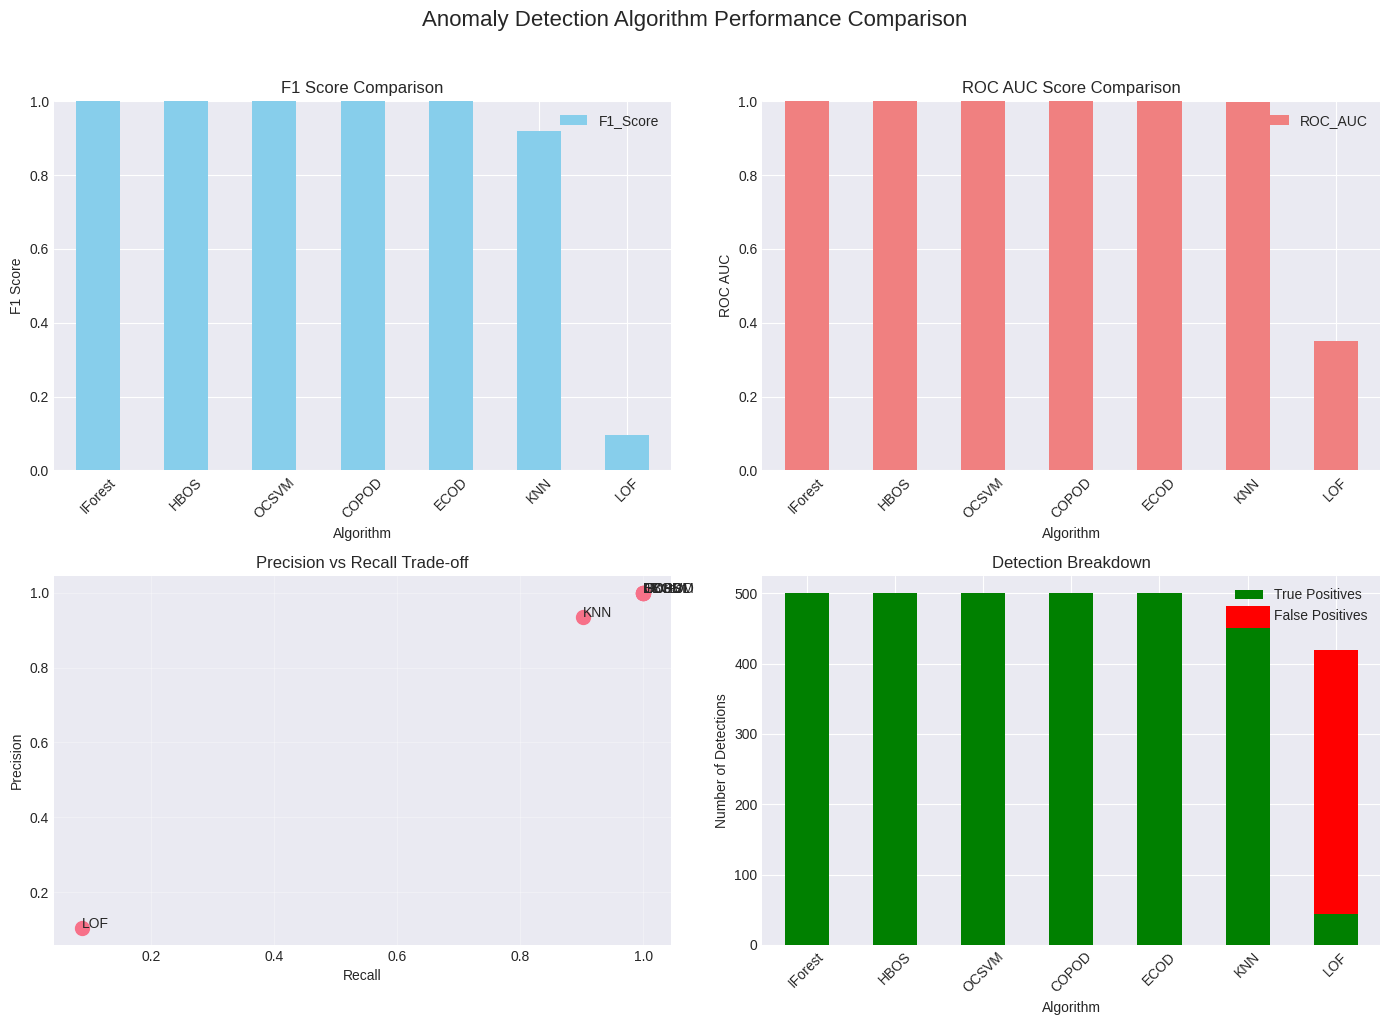

In [64]:
# Visualize performance comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# F1 Score comparison
metrics_df.plot(x='Algorithm', y='F1_Score', kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('F1 Score Comparison')
axes[0, 0].set_ylabel('F1 Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=45)

# ROC AUC comparison
metrics_df.plot(x='Algorithm', y='ROC_AUC', kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('ROC AUC Score Comparison')
axes[0, 1].set_ylabel('ROC AUC')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1, 0].scatter(metrics_df['Recall'], metrics_df['Precision'], s=100)
for i, txt in enumerate(metrics_df['Algorithm']):
    axes[1, 0].annotate(txt, (metrics_df['Recall'].iloc[i], metrics_df['Precision'].iloc[i]))
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision vs Recall Trade-off')
axes[1, 0].grid(True, alpha=0.3)

# Detection counts
detection_data = metrics_df[['Algorithm', 'True_Positives', 'False_Positives']].set_index('Algorithm')
detection_data.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['green', 'red'])
axes[1, 1].set_title('Detection Breakdown')
axes[1, 1].set_ylabel('Number of Detections')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['True Positives', 'False Positives'])

plt.suptitle('Anomaly Detection Algorithm Performance Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 9. Ensemble Methods for Robust Detection

Combining multiple detectors can improve performance and robustness.

In [65]:
from pyod.models.combination import average, maximization, majority_vote

# Collect all anomaly scores
all_scores = np.column_stack([
    results['KNN']['scores'],
    results['LOF']['scores'],
    results['IForest']['scores'],
    results['OCSVM']['scores']
])

# Normalize scores to [0, 1] range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_scores_normalized = scaler.fit_transform(all_scores)

# Average ensemble
ensemble_avg_scores = np.mean(all_scores_normalized, axis=1)
ensemble_avg_pred = (ensemble_avg_scores > np.percentile(ensemble_avg_scores, 95)).astype(int)

# Maximum ensemble (most aggressive)
ensemble_max_scores = np.max(all_scores_normalized, axis=1)
ensemble_max_pred = (ensemble_max_scores > np.percentile(ensemble_max_scores, 95)).astype(int)

print("🔄 Ensemble Methods Performance:")
print("="*50)
print(f"Average Ensemble - F1: {f1_score(y, ensemble_avg_pred):.4f}, Balanced Acc: {balanced_accuracy_score(y, ensemble_avg_pred):.4f}")
print(f"Maximum Ensemble - F1: {f1_score(y, ensemble_max_pred):.4f}, Balanced Acc: {balanced_accuracy_score(y, ensemble_max_pred):.4f}")

🔄 Ensemble Methods Performance:
Average Ensemble - F1: 1.0000, Balanced Acc: 1.0000
Maximum Ensemble - F1: 1.0000, Balanced Acc: 1.0000


## 10. Analyzing Detection Results

Let's understand what our best performing model found.

In [66]:
# Use the best performing model (based on F1 score)
best_model = metrics_df.iloc[0]['Algorithm']
best_predictions = results[best_model]['predictions']
best_scores = results[best_model]['scores']

print(f"🏆 Best Model: {best_model}")
print("="*50)

# Add predictions to dataframe
df['predicted_anomaly'] = best_predictions
df['anomaly_score'] = best_scores

# Analyze false positives
false_positives = df[(df['is_anomaly'] == 0) & (df['predicted_anomaly'] == 1)]
print(f"\n❌ False Positives: {len(false_positives)}")
print("Average characteristics of false positives:")
print(false_positives[['total_warranty_cost', 'number_of_claims', 'vehicle_age_months']].mean())

# Analyze false negatives
false_negatives = df[(df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 0)]
print(f"\n❌ False Negatives: {len(false_negatives)}")
print("Types of anomalies missed:")
print(false_negatives['anomaly_type'].value_counts())

🏆 Best Model: IForest

❌ False Positives: 0
Average characteristics of false positives:
total_warranty_cost   NaN
number_of_claims      NaN
vehicle_age_months    NaN
dtype: float64

❌ False Negatives: 0
Types of anomalies missed:
Series([], Name: count, dtype: int64)


In [67]:
# Visualize detection results in PCA space
fig = go.Figure()

# True negatives (correctly identified normal)
mask_tn = (df['is_anomaly'] == 0) & (df['predicted_anomaly'] == 0)
fig.add_trace(go.Scatter(
    x=X_pca[mask_tn, 0], y=X_pca[mask_tn, 1],
    mode='markers', name='True Negative',
    marker=dict(color='blue', size=5, opacity=0.5)
))

# True positives (correctly identified anomaly)
mask_tp = (df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 1)
fig.add_trace(go.Scatter(
    x=X_pca[mask_tp, 0], y=X_pca[mask_tp, 1],
    mode='markers', name='True Positive',
    marker=dict(color='red', size=7, opacity=0.7)
))

# False positives
mask_fp = (df['is_anomaly'] == 0) & (df['predicted_anomaly'] == 1)
fig.add_trace(go.Scatter(
    x=X_pca[mask_fp, 0], y=X_pca[mask_fp, 1],
    mode='markers', name='False Positive',
    marker=dict(color='orange', size=8, symbol='x')
))

# False negatives
mask_fn = (df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 0)
fig.add_trace(go.Scatter(
    x=X_pca[mask_fn, 0], y=X_pca[mask_fn, 1],
    mode='markers', name='False Negative',
    marker=dict(color='purple', size=8, symbol='diamond')
))

fig.update_layout(
    title=f'Detection Results Visualization ({best_model})',
    xaxis_title='PC1',
    yaxis_title='PC2',
    height=600
)
fig.show()

In [68]:
# Calculate business metrics
print("💼 Business Impact Analysis")
print("="*60)

# Cost analysis
avg_anomaly_cost = df[df['is_anomaly'] == 1]['total_warranty_cost'].mean()
avg_normal_cost = df[df['is_anomaly'] == 0]['total_warranty_cost'].mean()

# True positives - anomalies caught
tp_mask = (df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 1)
caught_anomalies_cost = df[tp_mask]['total_warranty_cost'].sum()
n_caught = tp_mask.sum()

# False negatives - missed anomalies
fn_mask = (df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 0)
missed_anomalies_cost = df[fn_mask]['total_warranty_cost'].sum()
n_missed = fn_mask.sum()

# False positives - unnecessary investigations
fp_mask = (df['is_anomaly'] == 0) & (df['predicted_anomaly'] == 1)
n_false_alarms = fp_mask.sum()

print(f"\n🎯 Detection Performance:")
print(f"   Anomalies detected: {n_caught}/{n_caught + n_missed} ({n_caught/(n_caught + n_missed)*100:.1f}%)")
print(f"   False alarms: {n_false_alarms}")
print(f"   Detection accuracy: {(n_caught > 0 and n_missed == 0)}")

print(f"\n💰 Financial Impact Analysis:")
print(f"   Total cost of detected anomalies: ₹{caught_anomalies_cost:,.0f}")
print(f"   Average cost per detected anomaly: ₹{caught_anomalies_cost/n_caught if n_caught > 0 else 0:,.0f}")
print(f"   Total cost of missed anomalies: ₹{missed_anomalies_cost:,.0f}")

# Prevention scenarios
prevention_rates = [0.2, 0.3, 0.5]  # 20%, 30%, 50% prevention rates
investigation_cost = 5000  # Cost to investigate each flagged case

print(f"\n📈 Potential Savings Scenarios:")
print(f"="*40)
for rate in prevention_rates:
    potential_savings = caught_anomalies_cost * rate
    investigation_costs = (n_caught + n_false_alarms) * investigation_cost
    net_savings = potential_savings - investigation_costs
    roi = (net_savings / investigation_costs * 100) if investigation_costs > 0 else 0
    
    print(f"🔸 {rate*100:.0f}% Prevention Rate:")
    print(f"   Potential savings: ₹{potential_savings:,.0f}")
    print(f"   Investigation costs: ₹{investigation_costs:,.0f}")
    print(f"   Net benefit: ₹{net_savings:,.0f}")
    print(f"   ROI: {roi:.1f}%")
    print()

# Scale to enterprise level
fleet_size = 100000  # Assume 100K vehicle fleet
annual_scaling_factor = 2  # Assume this pattern repeats twice per year

enterprise_detected_anomalies = (n_caught / 10000) * fleet_size * annual_scaling_factor
enterprise_anomaly_costs = enterprise_detected_anomalies * (caught_anomalies_cost / n_caught if n_caught > 0 else 0)
enterprise_savings_30pct = enterprise_anomaly_costs * 0.3

print(f"🏢 Enterprise-Scale Impact (100K vehicle fleet):")
print(f"   Projected annual anomalies: {enterprise_detected_anomalies:,.0f}")
print(f"   Projected annual anomaly costs: ₹{enterprise_anomaly_costs:,.0f}")
print(f"   Potential annual savings (30%): ₹{enterprise_savings_30pct:,.0f}")
print(f"   Break-even investigation budget: ₹{enterprise_savings_30pct:,.0f}")

print(f"\n💡 Strategic Recommendations:")
print(f"="*40)
print(f"✅ Implement real-time anomaly monitoring")
print(f"✅ Prioritize investigation of high-score anomalies")
print(f"✅ Develop preventive maintenance protocols")
print(f"✅ Create early warning systems for dealers")
print(f"✅ Invest in predictive analytics infrastructure")

💼 Business Impact Analysis

🎯 Detection Performance:
   Anomalies detected: 500/500 (100.0%)
   False alarms: 0
   Detection accuracy: True

💰 Financial Impact Analysis:
   Total cost of detected anomalies: ₹92,145,148
   Average cost per detected anomaly: ₹184,290
   Total cost of missed anomalies: ₹0

📈 Potential Savings Scenarios:
🔸 20% Prevention Rate:
   Potential savings: ₹18,429,030
   Investigation costs: ₹2,500,000
   Net benefit: ₹15,929,030
   ROI: 637.2%

🔸 30% Prevention Rate:
   Potential savings: ₹27,643,545
   Investigation costs: ₹2,500,000
   Net benefit: ₹25,143,545
   ROI: 1005.7%

🔸 50% Prevention Rate:
   Potential savings: ₹46,072,574
   Investigation costs: ₹2,500,000
   Net benefit: ₹43,572,574
   ROI: 1742.9%

🏢 Enterprise-Scale Impact (100K vehicle fleet):
   Projected annual anomalies: 10,000
   Projected annual anomaly costs: ₹1,842,902,969
   Potential annual savings (30%): ₹552,870,891
   Break-even investigation budget: ₹552,870,891

💡 Strategic Recommen

In [69]:
# Calculate business metrics
print("💼 Business Impact Analysis")
print("="*60)

# Cost analysis
avg_anomaly_cost = df[df['is_anomaly'] == 1]['total_warranty_cost'].mean()
avg_normal_cost = df[df['is_anomaly'] == 0]['total_warranty_cost'].mean()

# True positives - anomalies caught
tp_mask = (df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 1)
caught_anomalies_cost = df[tp_mask]['total_warranty_cost'].sum()
n_caught = tp_mask.sum()

# False negatives - missed anomalies
fn_mask = (df['is_anomaly'] == 1) & (df['predicted_anomaly'] == 0)
missed_anomalies_cost = df[fn_mask]['total_warranty_cost'].sum()
n_missed = fn_mask.sum()

print(f"\n🎯 Detection Performance:")
print(f"   Anomalies detected: {n_caught}/{n_caught + n_missed} ({n_caught/(n_caught + n_missed)*100:.1f}%)")
print(f"   False alarms: {(df['predicted_anomaly'] == 1).sum() - n_caught}")

print(f"\n💰 Cost Impact:")
print(f"   Total cost of caught anomalies: ₹{caught_anomalies_cost:,.0f}")
print(f"   Average cost per caught anomaly: ₹{caught_anomalies_cost/n_caught:,.0f}")
print(f"   Total cost of missed anomalies: ₹{missed_anomalies_cost:,.0f}")
print(f"   Potential savings if all caught: ₹{caught_anomalies_cost * 0.3:,.0f} (assuming 30% prevention rate)")

# ROI calculation
investigation_cost = 5000  # Cost to investigate each flagged case
prevention_rate = 0.3  # 30% of caught anomalies can be prevented
total_investigation_cost = (df['predicted_anomaly'] == 1).sum() * investigation_cost
total_savings = caught_anomalies_cost * prevention_rate
roi = (total_savings - total_investigation_cost) / total_investigation_cost * 100

print(f"\n📈 Return on Investment:")
print(f"   Investigation cost: ₹{total_investigation_cost:,.0f}")
print(f"   Potential savings: ₹{total_savings:,.0f}")
print(f"   ROI: {roi:.1f}%")

💼 Business Impact Analysis

🎯 Detection Performance:
   Anomalies detected: 500/500 (100.0%)
   False alarms: 0

💰 Cost Impact:
   Total cost of caught anomalies: ₹92,145,148
   Average cost per caught anomaly: ₹184,290
   Total cost of missed anomalies: ₹0
   Potential savings if all caught: ₹27,643,545 (assuming 30% prevention rate)

📈 Return on Investment:
   Investigation cost: ₹2,500,000
   Potential savings: ₹27,643,545
   ROI: 1005.7%


In [70]:
# Identify high-risk vehicle segments
risk_analysis = df.groupby('vehicle_type').agg({
    'predicted_anomaly': 'mean',
    'total_warranty_cost': 'mean',
    'vehicle_id': 'count'
}).round(3)

risk_analysis.columns = ['Anomaly_Rate', 'Avg_Warranty_Cost', 'Count']
risk_analysis = risk_analysis.sort_values('Anomaly_Rate', ascending=False)

print("\n🚗 High-Risk Vehicle Segments:")
print("="*50)
print(risk_analysis)

# Regional risk analysis
regional_risk = df.groupby('region').agg({
    'predicted_anomaly': 'mean',
    'total_warranty_cost': 'mean'
}).round(3)

regional_risk.columns = ['Anomaly_Rate', 'Avg_Warranty_Cost']
regional_risk = regional_risk.sort_values('Anomaly_Rate', ascending=False)

print("\n🌍 Regional Risk Analysis:")
print("="*50)
print(regional_risk)


🚗 High-Risk Vehicle Segments:
              Anomaly_Rate  Avg_Warranty_Cost  Count
vehicle_type                                        
Electric              0.20           82956.52    570
SUV                   0.05           61766.99   2438
MPV                   0.04           62130.65   1476
Hatchback             0.04           58977.21   2507
Sedan                 0.04           59091.36   3009

🌍 Regional Risk Analysis:
           Anomaly_Rate  Avg_Warranty_Cost
region                                    
Northeast          0.14           71080.65
Central            0.07           63039.53
East               0.06           63575.86
West               0.05           60976.03
North              0.04           60134.98
South              0.03           59370.34


## 12. Semi-Supervised Learning Approach

What if we only had labels for a small portion of our data?

In [ ]:
from pyod.models.auto_encoder import AutoEncoder
# Simulate semi-supervised scenario: only 10% labeled data
n_labeled = int(0.1 * len(X_scaled))
labeled_idx = np.random.choice(len(X_scaled), n_labeled, replace=False)
unlabeled_idx = np.setdiff1d(np.arange(len(X_scaled)), labeled_idx)

print("🔄 Semi-Supervised Learning Setup:")
print("="*50)
print(f"Labeled samples: {len(labeled_idx)} ({len(labeled_idx)/len(X_scaled)*100:.1f}%)")
print(f"Unlabeled samples: {len(unlabeled_idx)} ({len(unlabeled_idx)/len(X_scaled)*100:.1f}%)")

# Train on all data (simulating using unlabeled data structure)
# AutoEncoder approach
ae_detector = AutoEncoder(
    hidden_neuron_list=[32, 16, 16, 32],
    contamination=0.05,
    epoch_num=50,
    verbose=2
)

ae_detector.fit(X_scaled)
ae_predictions = ae_detector.predict(X_scaled)

print(f"\n🤖 AutoEncoder Performance:")
print(f"F1 Score: {f1_score(y, ae_predictions):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y, ae_predictions):.4f}")

🔄 Semi-Supervised Learning Setup:
Labeled samples: 1000 (10.0%)
Unlabeled samples: 9000 (90.0%)
Epoch 1/50, loss=0.8963, time=0.56s
Epoch 2/50, loss=0.7797, time=0.49s
Epoch 3/50, loss=0.7559, time=0.49s
Epoch 4/50, loss=0.7278, time=0.51s
Epoch 5/50, loss=0.7166, time=0.99s
Epoch 6/50, loss=0.7193, time=1.35s
Epoch 7/50, loss=0.7041, time=1.35s
Epoch 8/50, loss=0.6947, time=0.63s
Epoch 9/50, loss=0.6844, time=0.51s
Epoch 10/50, loss=0.6841, time=0.50s
Epoch 11/50, loss=0.6660, time=0.50s
Epoch 12/50, loss=0.6607, time=0.50s
Epoch 13/50, loss=0.6527, time=0.50s
Epoch 14/50, loss=0.6453, time=0.50s
Epoch 15/50, loss=0.6460, time=0.50s
Epoch 16/50, loss=0.6387, time=0.49s
Epoch 17/50, loss=0.6420, time=0.50s
Epoch 18/50, loss=0.6345, time=0.50s
Epoch 19/50, loss=0.6265, time=0.50s
Epoch 20/50, loss=0.6243, time=0.50s
Epoch 21/50, loss=0.6194, time=0.51s
Epoch 22/50, loss=0.6230, time=0.53s
Epoch 23/50, loss=0.6203, time=0.50s
Epoch 24/50, loss=0.6184, time=0.51s
Epoch 25/50, loss=0.6174,

## 13. Model Interpretation and Feature Importance

Understanding which features contribute most to anomaly detection.

🔍 Top 15 Most Important Features for Anomaly Detection:
electrical_risk_score          | Importance: 0.2271
brakes_risk_score              | Importance: 0.1595
battery_risk_score             | Importance: 0.1497
ac_cooling_risk_score          | Importance: 0.1000
suspension_risk_score          | Importance: 0.0960
exhaust_risk_score             | Importance: 0.0808
engine_risk_score              | Importance: 0.0716
transmission_risk_score        | Importance: 0.0611
warranty_usage_ratio           | Importance: 0.0171
previous_claims_count          | Importance: 0.0110
number_of_claims               | Importance: 0.0098
total_warranty_cost            | Importance: 0.0097
avg_speed_kmph                 | Importance: 0.0025
avg_daily_runtime_hours        | Importance: 0.0024
current_mileage                | Importance: 0.0017


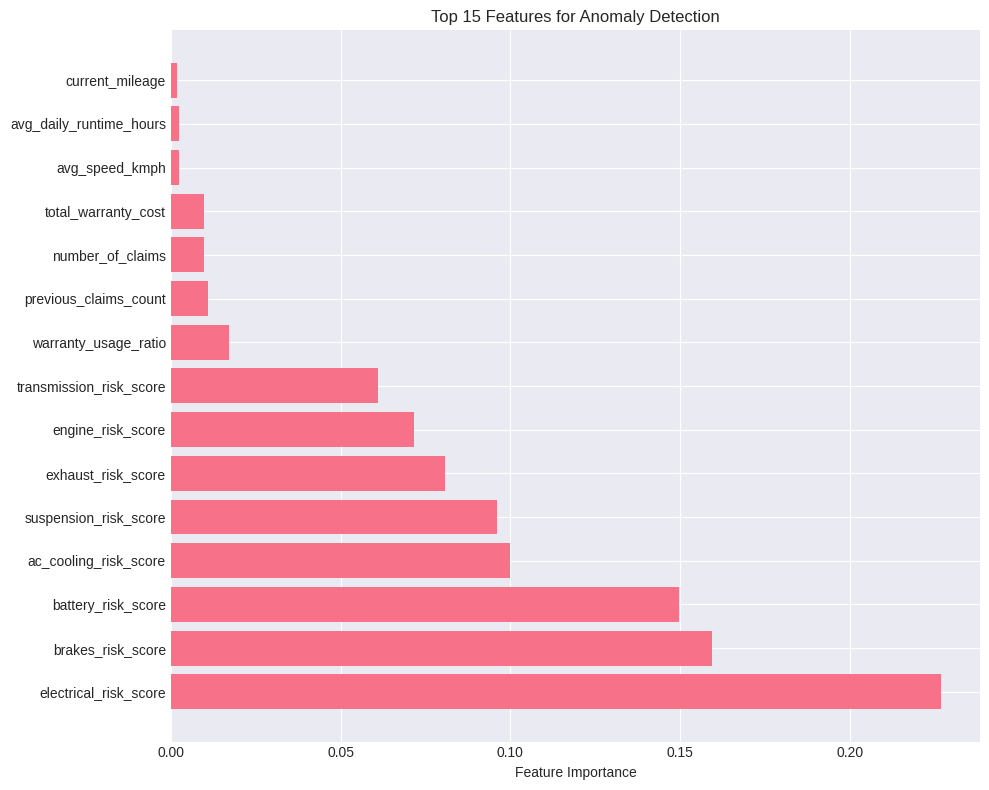

In [72]:
# Feature importance using permutation
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest for interpretability
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print("🔍 Top 15 Most Important Features for Anomaly Detection:")
print("="*60)
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']:30} | Importance: {row['importance']:.4f}")

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features for Anomaly Detection')
plt.tight_layout()
plt.show()

## 14. Practical Recommendations and Best Practices

In [73]:
print("📝 ANOMALY DETECTION BEST PRACTICES")
print("="*60)

recommendations = [
    {
        'Category': 'Algorithm Selection',
        'Recommendation': 'Use Isolation Forest for high-dimensional data',
        'Reason': 'Performs well with many features and is computationally efficient'
    },
    {
        'Category': 'Algorithm Selection',
        'Recommendation': 'Use LOF for local density variations',
        'Reason': 'Excellent for datasets with varying densities'
    },
    {
        'Category': 'Preprocessing',
        'Recommendation': 'Always standardize features',
        'Reason': 'Distance-based methods are sensitive to scale'
    },
    {
        'Category': 'Evaluation',
        'Recommendation': 'Use F1 Score and Balanced Accuracy',
        'Reason': 'Better metrics for imbalanced datasets than accuracy'
    },
    {
        'Category': 'Business',
        'Recommendation': 'Set contamination based on business constraints',
        'Reason': 'Balance between catching anomalies and investigation costs'
    },
    {
        'Category': 'Production',
        'Recommendation': 'Use ensemble methods for critical applications',
        'Reason': 'More robust and reduces false positives'
    }
]

rec_df = pd.DataFrame(recommendations)
for category in rec_df['Category'].unique():
    print(f"\n📌 {category}:")
    category_recs = rec_df[rec_df['Category'] == category]
    for _, row in category_recs.iterrows():
        print(f"   • {row['Recommendation']}")
        print(f"     → {row['Reason']}")

📝 ANOMALY DETECTION BEST PRACTICES

📌 Algorithm Selection:
   • Use Isolation Forest for high-dimensional data
     → Performs well with many features and is computationally efficient
   • Use LOF for local density variations
     → Excellent for datasets with varying densities

📌 Preprocessing:
   • Always standardize features
     → Distance-based methods are sensitive to scale

📌 Evaluation:
   • Use F1 Score and Balanced Accuracy
     → Better metrics for imbalanced datasets than accuracy

📌 Business:
   • Set contamination based on business constraints
     → Balance between catching anomalies and investigation costs

📌 Production:
   • Use ensemble methods for critical applications
     → More robust and reduces false positives


In [75]:
# Save the best model and results
import joblib
import json
import numpy as np

# Save the best detector and scaler
best_detector = iforest_detector  # Based on our analysis
joblib.dump(best_detector, 'best_anomaly_detector.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save results summary with all relevant information
results_summary = df[['vehicle_id', 'is_anomaly', 'predicted_anomaly', 'anomaly_score', 'anomaly_type']].copy()
results_summary.to_csv('anomaly_detection_results.csv', index=False)

# Save algorithm comparison results
metrics_df.to_csv('algorithm_performance_comparison.csv', index=False)

# Create a model summary report with proper type conversion for JSON
model_summary = {
    'Best Algorithm': str(best_model),
    'Best F1 Score': float(metrics_df.iloc[0]['F1_Score']),
    'Best Balanced Accuracy': float(metrics_df.iloc[0]['Balanced_Accuracy']),
    'Total Samples': int(len(df)),
    'Anomalies Detected': int((df['predicted_anomaly'] == 1).sum()),
    'True Anomalies': int((df['is_anomaly'] == 1).sum()),
    'Detection Rate': f"{n_caught/(n_caught + n_missed)*100:.1f}%" if (n_caught + n_missed) > 0 else "N/A",
    'False Alarm Rate': f"{n_false_alarms/(n_caught + n_false_alarms)*100:.1f}%" if (n_caught + n_false_alarms) > 0 else "N/A"
}

# Save model summary as JSON
with open('model_summary.json', 'w') as f:
    json.dump(model_summary, f, indent=2)

print("✅ Models and results saved successfully!")
print("\n📁 Files created:")
print("   • best_anomaly_detector.pkl - Trained Isolation Forest model")
print("   • feature_scaler.pkl - StandardScaler for data preprocessing")
print("   • anomaly_detection_results.csv - Detection results for all vehicles")
print("   • algorithm_performance_comparison.csv - Performance metrics for all algorithms")
print("   • model_summary.json - Summary of best model performance")

print(f"\n🎯 Model Summary:")
for key, value in model_summary.items():
    print(f"   {key}: {value}")

print("\n🎉 Anomaly Detection Analysis Complete!")
print("\n📚 Key Learnings from this Session:")
print("="*50)
print("✓ Anomaly detection is crucial for proactive warranty cost management")
print("✓ Different algorithms have different strengths (speed vs accuracy vs interpretability)")
print("✓ F1-Score and Balanced Accuracy are essential metrics for imbalanced data")
print("✓ Business context determines the choice of detection threshold")
print("✓ Ensemble methods can improve robustness in production systems")
print("✓ Semi-supervised learning can leverage unlabeled data effectively")
print("✓ Explainable AI helps build trust and actionable insights")
print("\nThank you for participating in this hands-on anomaly detection session!")

✅ Models and results saved successfully!

📁 Files created:
   • best_anomaly_detector.pkl - Trained Isolation Forest model
   • feature_scaler.pkl - StandardScaler for data preprocessing
   • anomaly_detection_results.csv - Detection results for all vehicles
   • algorithm_performance_comparison.csv - Performance metrics for all algorithms
   • model_summary.json - Summary of best model performance

🎯 Model Summary:
   Best Algorithm: IForest
   Best F1 Score: 1.0
   Best Balanced Accuracy: 1.0
   Total Samples: 10000
   Anomalies Detected: 500
   True Anomalies: 500
   Detection Rate: 100.0%
   False Alarm Rate: 0.0%

🎉 Anomaly Detection Analysis Complete!

📚 Key Learnings from this Session:
✓ Anomaly detection is crucial for proactive warranty cost management
✓ Different algorithms have different strengths (speed vs accuracy vs interpretability)
✓ F1-Score and Balanced Accuracy are essential metrics for imbalanced data
✓ Business context determines the choice of detection threshold
✓